**On Local Machine**

Downloaded archive.zop and unzipped using commands.

In [ ]:
import zipfile
import os
import shutil

In [ ]:
zip_path = 'HW6/archive.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('HW6')

In [26]:
print(f"Training Real images: {len(os.listdir('train/REAL'))}")
print(f"Training Fake images: {len(os.listdir('train/FAKE'))}")

Training Real images: 40000
Training Fake images: 40000


Create validation directory and move the images.

In [8]:
dataset_path = '.'
train_real_path = os.path.join(dataset_path, 'train/REAL')
train_fake_path = os.path.join(dataset_path, 'train/FAKE')
validation_path = os.path.join(dataset_path, 'validation')
validation_real_path = os.path.join(validation_path, 'REAL')
validation_fake_path = os.path.join(validation_path, 'FAKE')

os.makedirs(validation_real_path, exist_ok=True)
os.makedirs(validation_fake_path, exist_ok=True)

In [27]:
print(os.listdir('validation'))

['FAKE', 'REAL']


In [ ]:
def move_images(source_dir, target_dir, num_images=10000):
    images = os.listdir(source_dir)[:num_images]  # Get first 10,000 images
    for img_name in images:
        source_path = os.path.join(source_dir, img_name)
        target_path = os.path.join(target_dir, img_name)
        shutil.move(source_path, target_path)
    print(f"Moved {num_images} images from {source_dir} to {target_dir}")

move_images('./train/FAKE', './validation/FAKE', num_images=10000)
move_images('./train/REAL', './validation/REAL', num_images=10000)

Moved 10000 images from ./train/FAKE to ./validation/FAKE
Moved 10000 images from ./train/REAL to ./validation/REAL


In [28]:
print(f"Training REAL images: {len(os.listdir(train_real_path))}")
print(f"Training FAKE images: {len(os.listdir(train_fake_path))}")
print(f"Validation REAL images: {len(os.listdir(validation_real_path))}")
print(f"Validation FAKE images: {len(os.listdir(validation_fake_path))}")

Training REAL images: 40000
Training FAKE images: 40000
Validation REAL images: 10000
Validation FAKE images: 10000


In [11]:
!pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.0 MB ? eta -:--:--
   ---------------------------------------- 3.9/390.0 MB 26.0 MB/s eta 0:00:15
   - -------------------------------------- 12.3/390.0 MB 32.2 MB/s eta 0:00:12
   -- ------------------------------------- 21.2/390.0 MB 36.3 MB/s eta 0:00:11
   ---

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.4 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.0.2 which is incompatible.
langchain-chroma 0.1.4 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.0.2 which is incompatible.


In [2]:
from tensorflow.keras.utils import image_dataset_from_directory

img_height = 32
img_width = 32
epochs = 30
batch_size = 32

train_dataset = image_dataset_from_directory(
    "train",
    image_size=(img_height, img_width),  # Updated to match the model's input size
    batch_size=batch_size
)

validation_dataset = image_dataset_from_directory(
    "validation",
    image_size=(img_height, img_width),  # Updated to match the model's input size
    batch_size=batch_size
)

test_dataset = image_dataset_from_directory(
    "test",
    image_size=(img_height, img_width),  # Updated to match the model's input size
    batch_size=batch_size
)

Found 80000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


Model defination as per instructions

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

# Define input layer with shape matching the GIF (32x32 with 3 color channels)
inputs = keras.Input(shape=(img_height, img_width, 3))

# Rescaling layer to normalize pixel values
x = layers.Rescaling(1./255)(inputs)

# First Conv2D layer followed by Max Pooling
x = layers.Conv2D(32, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D((2, 2))(x)

# Second Conv2D layer followed by Max Pooling
x = layers.Conv2D(32, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D((2, 2))(x)

# Flatten layer to convert 2D output to 1D
x = layers.Flatten()(x)

# Dense layer with 64 units and ReLU activation
x = layers.Dense(64, activation="relu")(x)

# Output dense layer with a single unit and sigmoid activation
outputs = layers.Dense(1, activation="sigmoid")(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)

# Display model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,001 (328.13 KB)

 Trainable params: 84,001 (328.13 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="best_model.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

Train model

In [14]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 0.7934 - loss: 0.4285 - val_accuracy: 0.9003 - val_loss: 0.2453
Epoch 2/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8949 - loss: 0.2522 - val_accuracy: 0.8988 - val_loss: 0.2452
Epoch 3/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.9143 - loss: 0.2125 - val_accuracy: 0.9201 - val_loss: 0.1964
Epoch 4/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.9242 - loss: 0.1872 - val_accuracy: 0.9321 - val_loss: 0.1733
Epoch 5/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.9315 - loss: 0.1708 - val_accuracy: 0.9303 - val_loss: 0.1747
Epoch 6/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.9377 - loss: 0.1552 - val_accuracy: 0.9339 - val_loss: 0.1691
Epoch 7/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.9409 - loss: 0.1466 - val_accuracy: 0.9306 - val_loss: 0.1769
Epoch 8/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.9478 - 

In [15]:
import matplotlib.pyplot as plt

def plot_loss_acc_training(history, epochs=30):
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  epochs = range(1, len(accuracy) + 1)

  plt.plot(epochs, accuracy, "bo", label="Training accuracy")
  plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
  plt.title("Training and validation accuracy")
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, "bo", label="Training loss")
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.legend()
  plt.show()

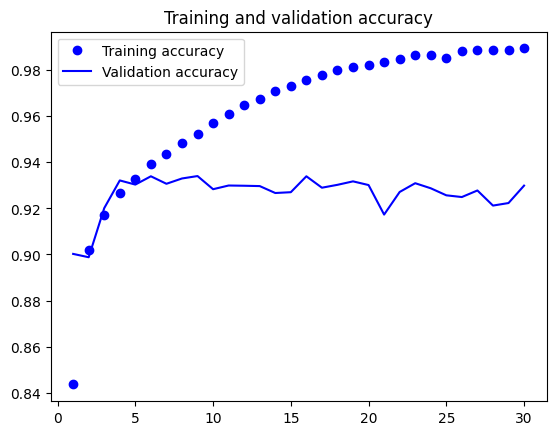

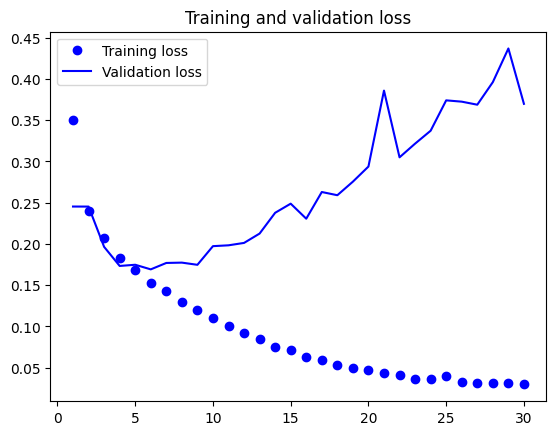

In [16]:
plot_loss_acc_training(history)

**Accuracy**

In [4]:
test_model = keras.models.load_model("best_model.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.9284 - loss: 0.1764
Test accuracy: 0.930
